In [2]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 300
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1+1
x12=np.random.randn(N,1)*sig1 + mu1+4
x21=np.random.randn(N,1)*sig2 + mu2+1
x22=np.random.randn(N,1)*sig2 + mu2+4
c = np.vstack((np.zeros((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


In [133]:
dataset.head()

,x,y,c
0,3.891640,8.824669,1.0
1,0.446282,3.456742,0.0
2,-0.128767,3.368589,0.0
3,-0.200069,3.217469,0.0
4,2.687609,8.379338,1.0


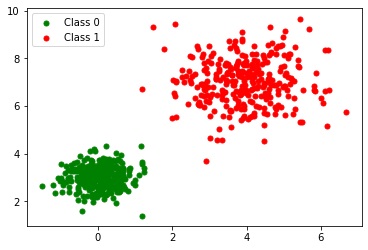

In [4]:
plt.scatter(dataset[dataset['c']==0]['x'], dataset[dataset['c']==0]['y'], marker='o',s=25, color='g')
plt.scatter(dataset[dataset['c']>0]['x'], dataset[dataset['c']>0]['y'], marker='o',s=25, color='r')
plt.legend(['Class 0', 'Class 1'])

In [135]:
# !pip uninstall ipnb 

In [136]:
import ipdb

In [74]:
class Jean_logisticRegression(object):
    
    def __init__(self, features, target, params, lr=0.05, tolerance=1e-4, Max_iter=400, verbose=True):
        self.features=features
        self.target=target
        self.lr=lr
        self.tolerance=tolerance
        self.Max_iter=Max_iter
        self.params=params
        self.verbose=verbose
        
    def add_intercept(self, intercept):
        self.intercept=intercept
        self.features=np.hstack([self.intercept, self.features])
        print("Intercept added successfully")
        
    def sigmoid(self, x):
        return 1./(1+np.exp(-x))

    def get_gradient(self, theta, X, y):
        #ipdb.set_trace
        return np.dot(y-self.sigmoid(np.dot(theta, X)), X)
    
    def loss(self):
        return (-1.0/len(self.target))*sum([self.target[i]*np.log(self.sigmoid(np.dot(self.params, self.features[i,:])))+(1-self.target[i])*np.log(1-self.sigmoid(np.dot(self.params, self.features[i,:]))) for i in range(len(self.target))])
    
    def fit(self):
        Norm=np.linalg.norm
        Iter=0
        old_params=self.params+1
        while(Norm(self.params-old_params)>self.tolerance and Iter<=self.Max_iter):
            old_params=self.params
            indices=list(range(self.features.shape[0]))
            np.random.shuffle(indices)
            # We just change the way we compute the gradient
            Mini_batch=indices[:50]
            #print(Mini_batch)
            gradient=sum([self.get_gradient(self.params, self.features[i,:], self.target[i]) for i in Mini_batch])
            self.params=self.params+self.lr*gradient
            if self.verbose:
                print("Loss: %.6f"%self.loss())
            Iter += 1
        print('Number of iterations:', Iter-1)
        return self.params
    
    def predict(self, Features):
        Predictions=[]
        Intercept=np.ones(Features.shape[0]).reshape(-1,1)
        Features=np.hstack([Intercept, Features])
        for i in range(Features.shape[0]):
            if self.sigmoid(np.dot(Features[i,:], self.params))>0.5:
                Predictions.append(1.0)
            else:
                Predictions.append(0.0)


        return np.array(Predictions)

In [75]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 300
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((np.zeros((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
#dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


Features=X[:,:-1]
Target=X[:,-1]
theta=np.random.randn(1+Features.shape[1])


logistic_regression=Jean_logisticRegression(features=Features, target=Target, params=theta, lr=0.005, Max_iter=500, verbose=True)

In [76]:
Intercept_column=np.ones_like(Target).reshape(-1,1)
logistic_regression.add_intercept(Intercept_column)

Intercept added successfully


In [77]:
theta_optimal=logistic_regression.fit()

Loss: 1.150983
Loss: 0.979947
Loss: 0.846801
Loss: 0.706980
Loss: 0.595855
Loss: 0.520620
Loss: 0.457658
Loss: 0.398156
Loss: 0.354607
Loss: 0.321788
Loss: 0.288885
Loss: 0.264527
Loss: 0.243623
Loss: 0.226244
Loss: 0.213946
Loss: 0.201565
Loss: 0.191626
Loss: 0.180944
Loss: 0.172081
Loss: 0.164624
Loss: 0.157714
Loss: 0.151254
Loss: 0.144335
Loss: 0.138438
Loss: 0.134346
Loss: 0.130916
Loss: 0.127480
Loss: 0.123197
Loss: 0.119236
Loss: 0.115837
Loss: 0.113253
Loss: 0.109153
Loss: 0.106763
Loss: 0.103925
Loss: 0.101612
Loss: 0.099622
Loss: 0.097530
Loss: 0.096053
Loss: 0.093885
Loss: 0.091071
Loss: 0.089595
Loss: 0.087697
Loss: 0.086520
Loss: 0.084519
Loss: 0.082925
Loss: 0.081511
Loss: 0.080432
Loss: 0.079138
Loss: 0.077786
Loss: 0.076823
Loss: 0.075543
Loss: 0.074555
Loss: 0.073944
Loss: 0.073179
Loss: 0.071709
Loss: 0.070638
Loss: 0.069240
Loss: 0.068320
Loss: 0.067510
Loss: 0.066840
Loss: 0.065867
Loss: 0.065083
Loss: 0.064309
Loss: 0.063525
Loss: 0.062724
Loss: 0.062109
Loss: 0.06

In [78]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 2000
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((np.zeros((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X1 = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
#dataset = pd.DataFrame(data=X, columns=['x','y','c'])

In [79]:
Features=X1[:,:-1]
Target=X1[:,-1]

In [80]:
Accuraccy=(logistic_regression.predict(Features)==Target).sum()/len(Target)
print("Accuracy: {} %".format(100*Accuraccy))

Accuracy: 99.825 %
